In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [13]:
%matplotlib inline

In [14]:
plt.rcParams['figure.figsize'] = [10., 10.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

# Regression

Here we explore different regression algorithms using the Boston Housing dataset

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [126]:
X_train, X_test, y_train, y_test = train_test_split(boston_dataset['data'], boston_dataset['target'], test_size = 0.2, random_state=5)

In [150]:
from sklearn.preprocessing import StandardScaler

In [152]:
s = StandardScaler()
s.fit(X_train)

StandardScaler()

In [155]:
X_train = s.transform(X_train)

In [157]:
X_test = s.transform(X_test)

We can now try out different regression models

In [245]:
from tensorflow import keras

inputs = keras.Input(shape=(X_train.shape[1],))
h = keras.layers.Dense(32, activation="relu")(inputs)
outputs = keras.layers.Dense(1, activation='linear')(h)
reg = keras.Model(inputs=inputs, outputs=outputs)
optimizer = keras.optimizers.Adam(0.01)

reg.compile(loss='mse', optimizer=optimizer)

In [158]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [238]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=10_000)

In [253]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=20, max_depth=4, criterion='mse')

In [255]:
reg.fit(X_train, y_train)#, epochs=50, verbose=0, )

RandomForestRegressor(max_depth=4, n_estimators=20)

In [256]:
print('%.2f'%np.average(np.square(y_train - reg.predict(X_train).flatten())))
print('%.2f'%np.average(np.square(y_test - reg.predict(X_test).flatten())))

7.49
13.25


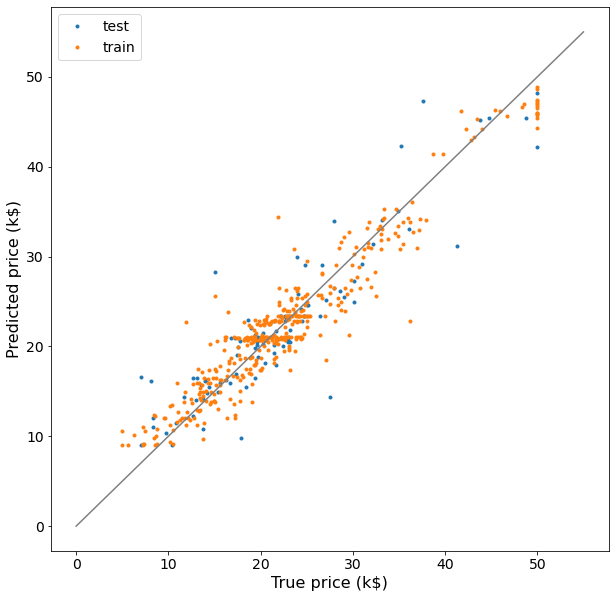

In [257]:
plt.plot(y_test, reg.predict(X_test), '.', label='test')
plt.plot(y_train, reg.predict(X_train), '.', label='train')
plt.plot([0,55], [0,55], c='grey')
plt.gca().set_xlabel('True price (k$)')
plt.gca().set_ylabel('Predicted price (k$)')
plt.legend()
#plt.savefig('boston_DT.png', bbox_inches='tight')

## Feature Importance

We can analyze the imprtance of the various input features, here done via two separate methods:. In both cases the results are comparable and `LSTAT` is the most important variable, while `ZN`, `CHAS` amd `RAD` carry virtually no information.

In [258]:
import eli5
from eli5.sklearn import PermutationImportance

You may need to `pip install eli5`
And later `pip install shap`

In [259]:
perm = PermutationImportance(reg, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = boston_dataset['feature_names'])

Weight,Feature
0.6583 ± 0.0975,LSTAT
0.5305 ± 0.0580,RM
0.1077 ± 0.0294,DIS
0.0515 ± 0.0078,CRIM
0.0064 ± 0.0020,NOX
0.0058 ± 0.0020,AGE
0.0042 ± 0.0019,B
0.0037 ± 0.0023,TAX
0.0024 ± 0.0012,PTRATIO
0.0009 ± 0.0006,RAD


In [260]:
import shap
shap.initjs()

In [261]:
explainer = shap.Explainer(reg)

In [262]:
shap_values = explainer(X_test)

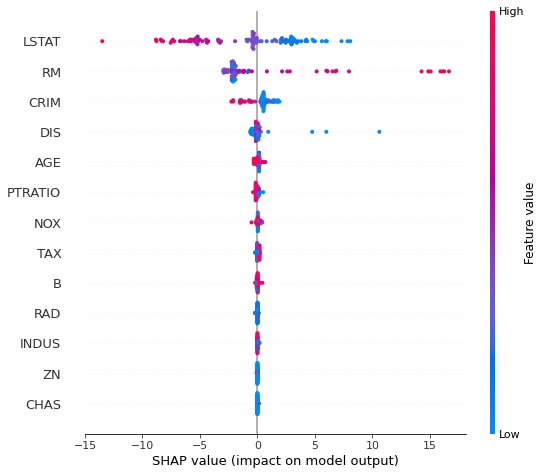

In [263]:
shap.summary_plot(shap_values, X_test, feature_names = boston_dataset['feature_names'])

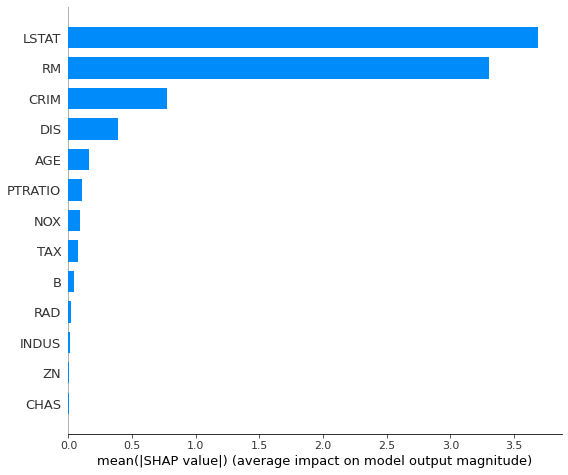

In [264]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = boston_dataset['feature_names'])